### Reinforcement Learning:

>* **Name:**  Kishan Kanaiyalal Patel 
>* **Project:** Solving GridWorld Problem  


In [1]:
#Importing required libraries

import enum
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
from typing import Tuple

In [2]:
#Creating a class for actions (movement) which can be left, right, up, and down.

class Actions(enum.IntEnum):
    LEFT = 1
    RIGHT = 2
    UP = 3
    DOWN = 4

In [3]:
# Function to visualize state values(heatmap)

def visualize_state_values(state_values: np.ndarray):
    plt.imshow(state_values, cmap="Reds")
    
    # Add the values of state as text on top of each cell
    for (j, i), label in np.ndenumerate(state_values):
        plt.text(i, j, f'{label:0.2f}', ha='center', va='center', color='black')
    plt.show()

In [4]:
# Random policy class to define action probabilities

class RandomPolicy:
    def action_prob(self, state: int):
        return 0.25 # Return the action probability, which is 0.25 for all actions

In [5]:
# Class for the Gridworld environment

class Gridworld:
    # Initialize the environment with its width, height, good and bad cells
    def __init__(self, width: int, height: int, good_cells: list, bad_cells: list):
        self.width = width # width of gridworld
        self.height = height # height of gridworld
        self.start_state = (0,0) # start state
        self.end_state = (width-1, height-1) # end state
        self.good_cells = good_cells # list of good cells
        self.bad_cells = bad_cells # list of bad cells
        
    # Perform a step in the gridworld environment given a state and action
    def step(self, state: Tuple[int, int], action: Actions):
        i, j = state
        reward = 0
        # Move the state based on the action
        if action == Actions.LEFT:
            next_state = (max(i-1,0), j)
        elif action == Actions.RIGHT:
            next_state = (min(i+1, self.width-1), j)
        elif action == Actions.UP:
            next_state = (i, max(j-1,0))
        elif action == Actions.DOWN:
            next_state = (i, min(j+1, self.height-1))

        # Check if next state is a good cell and give reward accordingly
        if next_state in good_cells:
            if next_state == (0,1):
                reward = reward + 10
            else:
                reward = reward + 5    

        # Check if next state is a bad cell and give penalty accordingly
        elif next_state in bad_cells:
            reward = reward - 1 
        # If next state is neither good nor bad, reward is 0
        else:
            reward = 0
        return next_state, reward

    # Function to reset the environment
        def reset(self):
            return self.start_state

In [6]:
#Function to calculate the state values

def calculate_state_values(policy, env, discount_factor, num_iterations):
    # Initialize the state values matrix with all elements set to 0
    state_values = np.zeros((env.width, env.height))

    # Repeat for the specified number of iterations
    for i in range(num_iterations):
        # Initialize a matrix to store the new state values
        new_state_values = np.zeros((env.width, env.height))

        # Loop through all states
        for j in range(env.width):
            for k in range(env.height):
                state = (j,k)

                # Initialize the value of the state to 0
                value = 0

                # Loop through all actions
                for action in Actions:
                    # Take the action and get the reward and next state
                    next_state, reward = env.step(state, action)

                    # Update the value of the state based on the action taken
                    value += policy.action_prob(state) * (reward + (discount_factor * state_values[next_state[0], next_state[1]]))

                # Update the new state values matrix
                new_state_values[j,k] = value

        # Replace the old state values matrix with the updated new state values matrix
        state_values = new_state_values

    # Return the final state values matrix
    return state_values

State values:


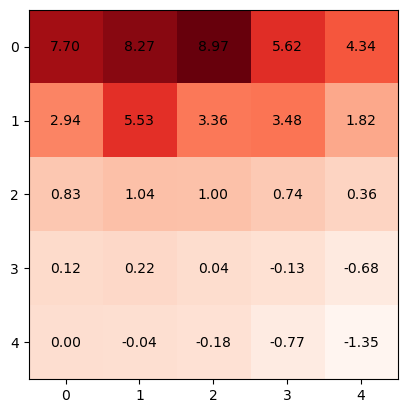

In [9]:
if __name__ == "__main__":
    
    # Define the good cells
    good_cells = [(0,1), (0,3)]
    # Define the bad cells
    bad_cells = [(1,1), (4,4)]
    
    # Create the Gridworld environment with the specified good and bad cells
    env = Gridworld(5, 5, good_cells, bad_cells)
    
    # Initialize a random policy
    policy = RandomPolicy()
    
    # Set the discount factor
    discount_factor = 0.9
    
    # Set the number of iterations
    Iterations = 5
    
    # Calculate the state values for the environment and policy
    state_values = calculate_state_values(policy, env, discount_factor, Iterations)
    
    # Visualising the state values
    print("State values:")
    visualize_state_values(state_values)
